# Modeling:
### linear regression with cross validating

In [250]:
import numpy as np
import math

import pandas as pd
from pandas.api.types import CategoricalDtype

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import linear_model as lm
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold


# Plot settings
plt.rcParams['figure.figsize'] = (12, 9)
plt.rcParams['font.size'] = 12

In [251]:
def standardize_columns(data):
    '''
    Input:
      data (data frame): contains only numeric columns
    Output:
      data frame, the same data, except each column is standardized
      to have 0-mean and unit variance
    '''
    #your code goes here [1 line should suffice]
    standardized_data = (data-data.mean())/ data.std()
    return standardized_data

In [238]:
full_data = pd.read_csv("../visual/full_data_Pop.csv")
train, test = train_test_split(full_data, test_size=0.2)

In [249]:
train.shape

(6647, 27)

In [240]:
train.dtypes

Unnamed: 0            int64
artist_name          object
track_uri            object
artist_uri           object
name                 object
album_uri            object
duration_ms           int64
album_name           object
acousticness        float64
danceability        float64
energy              float64
instrumentalness    float64
liveness            float64
loudness            float64
speechiness         float64
tempo               float64
valence             float64
track_popularity    float64
id                   object
popularity            int64
explicit              int64
id_artists           object
release_date         object
key                   int64
mode                  int64
time_signature        int64
dtype: object

In [241]:
def fix_year(data):
    data['release_date'] = pd.to_datetime(data['release_date']) # convert 'dates' column to datetime dtype
    data['year'] = data['release_date'].dt.year # extract year value into new 'year' column
    return data

In [252]:

def process_data_fm(data):

    data = fix_year(data)

    data = (
        data.pipe(select_columns,'popularity','duration_ms','explicit','year'
                  ,'danceability','energy','instrumentalness'
                  ,'liveness','loudness','speechiness','tempo','valence'
                  )
    )
    data.columns.values
    x = standardize_columns(data).drop(['popularity'], axis=1)
    # x = data.drop(['popularity'], axis=1)
    y = data['popularity']
    return x,y

In [253]:
def select_columns(data, *columns):
    return data.reindex(columns = columns)

In [259]:
def rmse(actual, predicted):
    """
    Calculates RMSE from actual and predicted values
    Input:
      actual (1D array-like): vector of actual values
      predicted (1D array-like): vector of predicted/fitted values
    Output:
      a float, the root-mean square error
    """
    MSE = np.square(np.subtract(actual,predicted)).mean()
    rmse = math.sqrt(MSE)
    return rmse

## Training the model "final_model" with extracted data.
split data to train and test and calculate RSME of the model

In [255]:
X_train, y_train = process_data_fm(train)
X_test, y_test = process_data_fm(test)

In [261]:
alphas = np.arange(.1, 200.1, .1)
final_model = lm.LassoCV(alphas=alphas, cv=5)

# Fit and predict
final_model.fit(X_train, y_train)
y_predicted = final_model.predict(X_test)

print(f'The validation RMSE for this model with '
      f'alpha={round(float(final_model.alpha_), 2)} is '
      f'{round(rmse(y_test, y_predicted), 2)}.')

The validation RMSE for this model with alpha=0.1 is 11.05.


Text(0, 0.5, 'RMSE')

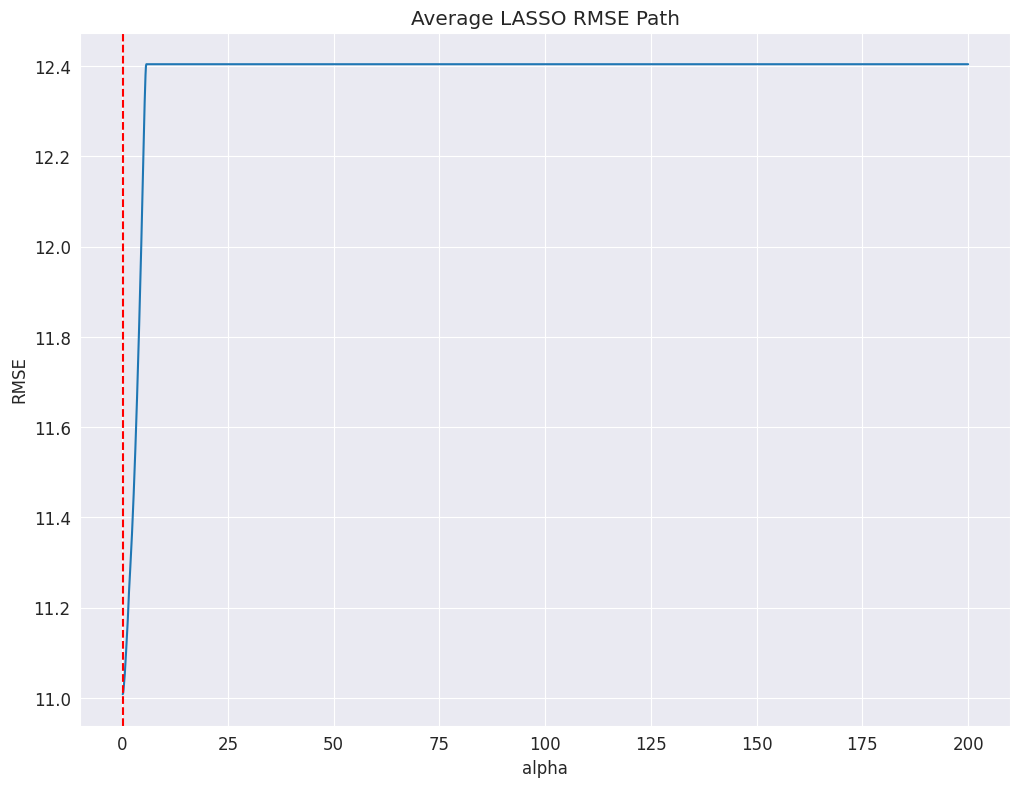

In [262]:
optimal_alpha = round(float(final_model.alpha_), 2)
plt.plot(final_model.alphas_, np.sqrt(np.apply_along_axis(np.mean, 1, final_model.mse_path_)))
plt.axvline(x=optimal_alpha, color='red', linestyle='dashed')
ax = plt.gca()
ax.set_title('Average LASSO RMSE Path')
ax.set_xlabel('alpha')
ax.set_ylabel('RMSE')

## Use "final_model" to predict the popularity of kaggle data and evaluate to predict with real popularity.


The validation RMSE for this model with alpha=0.1 is 29.53.


Text(0, 0.5, 'RMSE')

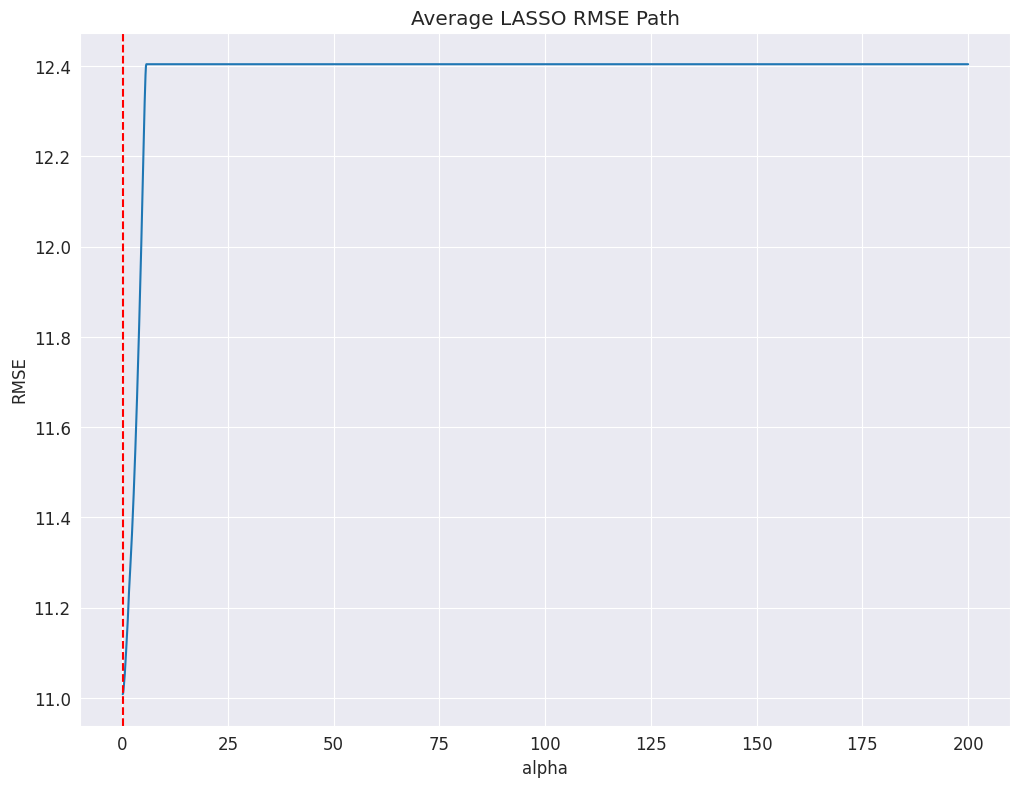

In [263]:
data_good = pd.read_csv("tracks.csv")
# train_good, test_good = train_test_split(data_good, test_size=0.2)

X_test_good, y_test_good = process_data_fm(data_good)

# predict popularity with other data in model
good_data_predict = final_model.predict(X_test_good)


print(f'The validation RMSE for this model with '
      f'alpha={round(float(final_model.alpha_), 2)} is '
      f'{round(rmse(y_test_good, good_data_predict), 2)}.')
optimal_alpha = round(float(final_model.alpha_), 2)
plt.plot(final_model.alphas_, np.sqrt(np.apply_along_axis(np.mean, 1, final_model.mse_path_)))
plt.axvline(x=optimal_alpha, color='red', linestyle='dashed')
ax = plt.gca()
ax.set_title('Average LASSO RMSE Path')
ax.set_xlabel('alpha')
ax.set_ylabel('RMSE')


## Training the model "good_model" with Kaggle data.
split data to train and test and calculate RSME of the model

The validation RMSE for this model with alpha=0.1 is 14.55.


Text(0.5, 0, 'alpha')

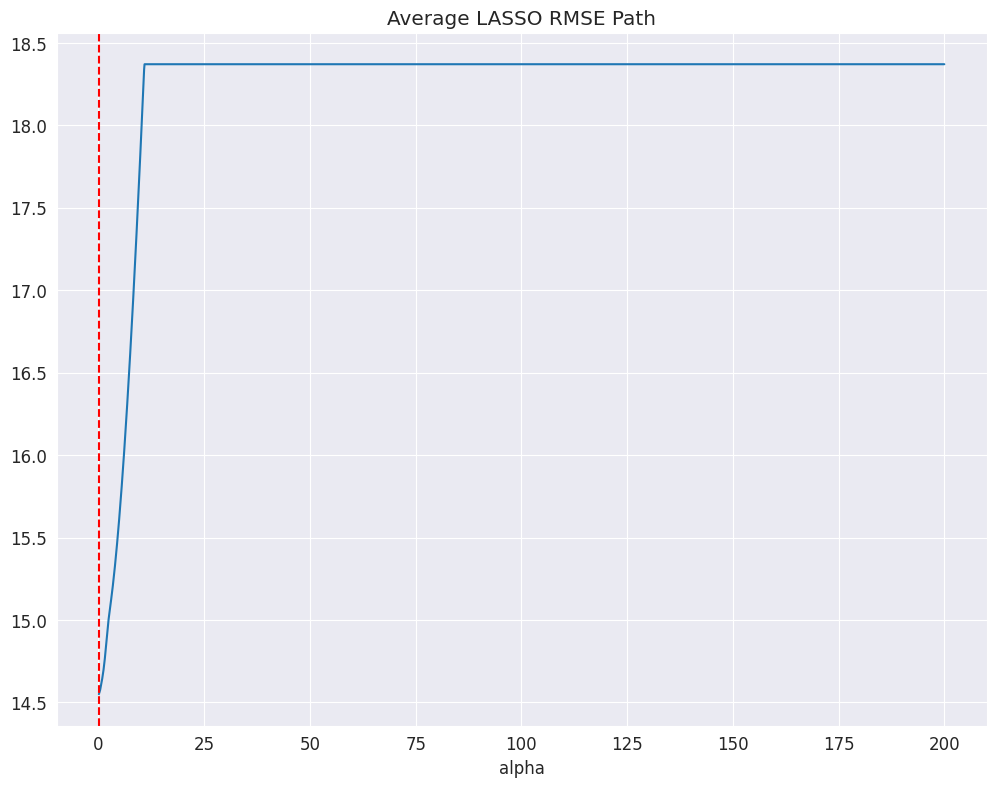

In [264]:
data_good = pd.read_csv("tracks.csv")
train_good, test_good = train_test_split(data_good, test_size=0.2)
train_good.head()
train_good.dtypes


def fix_year(data):
    data['release_date'] = pd.to_datetime(data['release_date'])  # convert 'dates' column to datetime dtype
    data['year'] = data['release_date'].dt.year  # extract year value into new 'year' column
    return data


def process_data_fm(data):
    data = fix_year(data)

    data = (
        data.pipe(select_columns, 'popularity', 'duration_ms', 'explicit', 'year'
                  , 'danceability', 'energy', 'instrumentalness'
                  , 'liveness', 'loudness', 'speechiness', 'tempo', 'valence'
                  )
    )

    x = standardize_columns(data).drop(['popularity'], axis=1)
    y = data['popularity']
    return x, y


def select_columns(data, *columns):
    return data.reindex(columns=columns)


def rmse(actual, predicted):
    """
    Calculates RMSE from actual and predicted values
    Input:
      actual (1D array-like): vector of actual values
      predicted (1D array-like): vector of predicted/fitted values
    Output:
      a float, the root-mean square error
    """
    MSE = np.square(np.subtract(actual, predicted)).mean()
    rmse = math.sqrt(MSE)
    return rmse


X_train_good, y_train_good = process_data_fm(train_good)
X_test_good, y_test_good = process_data_fm(test_good)
alphas = np.arange(0.1, 200.1, .1)
good_model = lm.LassoCV(alphas=alphas, cv=5)

# Fit and predict
good_model.fit(X_train_good, y_train_good)
y_predicted_good = good_model.predict(X_test_good)

print(f'The validation RMSE for this model with '
      f'alpha={round(float(good_model.alpha_), 2)} is '
      f'{round(rmse(y_test_good, y_predicted_good), 2)}.')
optimal_alpha = round(float(good_model.alpha_), 2)
plt.plot(good_model.alphas_, np.sqrt(np.apply_along_axis(np.mean, 1, good_model.mse_path_)))
plt.axvline(x=optimal_alpha, color='red', linestyle='dashed')
ax = plt.gca()
ax.set_title('Average LASSO RMSE Path')
ax.set_xlabel('alpha')



### Preprocessing
# Spotipy

In [2]:
import os
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials as cc
import numpy as np
import pandas as pd
from IPython.display import display
import warnings
import time
import json
from pprint import pprint
from spotipy.oauth2 import SpotifyClientCredentials

In [3]:
sp = spotipy.Spotify(client_credentials_manager=SpotifyClientCredentials(client_id = '85bc9d29761941f2a0dafdc9aa8a4903',client_secret = 'e1ee091ccf0b44b6a0dc243abb2f1414'),requests_timeout=10, retries=10)

# get the playlists from json files

In [4]:
playlists = []
path = 'data'
count = 5
for filename in os.listdir(path):
    count -= 1
    if count < 0:
        break
    f = os.path.join(path, filename)
    if os.path.isfile(f):
        d = json.load(open(f))
        playlists.append(pd.DataFrame(d['playlists']))

playlists = pd.concat(playlists)
playlists = playlists.reset_index(drop=True)
print(playlists.shape)

(5000, 12)


In [4]:
# get the tracks from playlists 
songs = []
for i in range(len(playlists)):
    tracks = playlists.iloc[i].loc['tracks']
    for track in tracks:
        songs.append(track)

songs_df = pd.DataFrame(songs)
print(songs_df.shape)
songs_df.head()

(334487, 8)


,pos,artist_name,track_uri,artist_uri,track_name,album_uri,duration_ms,album_name
0,0,Lost Frequencies,spotify:track:2vCtiBvJJZfz773yTfAxPP,spotify:artist:7f5Zgnp2spUuuzKplmRkt7,What Is Love 2016 - Mike Mago Remix,spotify:album:4N1e8k2o2NN932Y8xgZV1p,209882,What Is Love 2016
1,1,John Legend,spotify:track:5WOLZP8KrXiupBjG1SSN5U,spotify:artist:5y2Xq6xcjJb2jVM54GHK3t,Love Me Now - Dave Audé Remix Radio Edit,spotify:album:2CFZOjwtV7B6XzULEwIdHN,219106,Love Me Now (Remixes)
2,2,July Child,spotify:track:0oQDQ9QiqsO63EEBAro8Le,spotify:artist:3Jghk94Gog2dhBAO7ZZaM8,Thinkin of U,spotify:album:2i0oT2HtRN4o3P45zQjel7,194000,Thinkin of U
3,3,Tiësto,spotify:track:7MUS0La2IQ85vJ59fQqtoN,spotify:artist:2o5jDhtHVPhrJdv3cEQ99Z,I Will Be Here - (Wolfgang Gartner Remix),spotify:album:2qY9UxNEbQR2O2ECc3Fd48,237066,Kaleidoscope Remixed
4,4,Joe Stone,spotify:track:3ciyZYofjiqmMUElM5qgGB,spotify:artist:4kwEd1P9j15ZqUVP5zK7Pv,The Party (This Is How We Do It),spotify:album:3SBDe6WBbEXNtjraPxXLOh,185807,The Party (This Is How We Do It)


In [5]:
# take out the duplicates
songs_df = songs_df.drop_duplicates('track_uri')
print(songs_df.shape)

(108870, 8)


In [11]:
#DO NOT RUN THE AUDIO FEATURES HAVE ALREADY BEEN STORED IN THE AUDIO_FEATURES FILE
# find audio feature of each track given its uri
def run_features():
    sleep_min = 1
    sleep_max = 2
    start_time = time.time()
    request_count = 0
    tracks_w_features = pd.DataFrame()

    for i in range(0,3344):
        if request_count % 13 == 0:
            time.sleep(np.random.uniform(sleep_min, sleep_max))
        else:
            tracks_to_get = songs_df.iloc[request_count:request_count+49]["track_uri"] #get the uri of these songs to get audio features
            tracks = pd.DataFrame(sp.audio_features(tracks_to_get))
            tracks_w_features = tracks_w_features.append(tracks)
        request_count+=49

    #remove useless-categorical columns, can use index to get song information later
    # tracks_w_features = tracks_w_features.drop(columns=['mode','key','time_signature', 'duration_ms','analysis_url','track_href','id','type']).copy()
    warnings.filterwarnings("ignore")
    warnings.filterwarnings(action='once')

    from pathlib import Path
    filepath = Path('data.csv')
    filepath.parent.mkdir(parents=True, exist_ok=True)
    tracks_w_features.to_csv(filepath)

In [ ]:
run_features()

In [44]:
# tracks_to_get = songs_df.iloc[request_count:request_count+49]["track_uri"] #get the uri of these songs to get audio features
# artist_to_get = songs_df.iloc[request_count:request_count+49]["artist_uri"]
req = 0
tracks_w_features = pd.DataFrame()
popularity_t = []
popularity_a = []
for i in range(3629):
    tracks = pd.DataFrame(sp.audio_features(songs_df.iloc[req:req+30]['track_uri']))
    # artist_to_get = songs_df.iloc[req:req+30]["artist_uri"]
    tracks_w_features = tracks_w_features.append(tracks)
    pop_a = sp.artists(songs_df.iloc[req:req+30]['artist_uri'])
    pop_t = sp.tracks(songs_df.iloc[req:req+30]['track_uri'])
    popularity_t.append(pop_t)
    popularity_a.append(pop_a)
    tracks_w_features.append(tracks)
    # tracks_w_features['artist_popularity'][req:req+30] = pop_a
    # tracks_w_features['track_popularity'][req:req+30] = pop_t
    req +=30

    print(req)


30
60
90
120
150
180
210
240
270
300
330
360
390
420
450
480
510
540
570
600
630
660
690
720
750
780
810
840
870
900
930
960
990
1020
1050
1080
1110
1140
1170
1200
1230
1260
1290
1320
1350
1380
1410
1440
1470
1500
1530
1560
1590
1620
1650
1680
1710
1740
1770
1800
1830
1860
1890
1920
1950
1980
2010
2040
2070
2100
2130
2160
2190
2220
2250
2280
2310
2340
2370
2400
2430
2460
2490
2520
2550
2580
2610
2640
2670
2700
2730
2760
2790
2820
2850
2880
2910
2940
2970
3000
3030
3060
3090
3120
3150
3180
3210
3240
3270
3300
3330
3360
3390
3420
3450
3480
3510
3540
3570
3600
3630
3660
3690
3720
3750
3780
3810
3840
3870
3900
3930
3960
3990
4020
4050
4080
4110
4140
4170
4200
4230
4260
4290
4320
4350
4380
4410
4440
4470
4500
4530
4560
4590
4620
4650
4680
4710
4740
4770
4800
4830
4860
4890
4920
4950
4980
5010
5040
5070
5100
5130
5160
5190
5220
5250
5280
5310
5340
5370
5400
5430
5460
5490
5520
5550
5580
5610
5640
5670
5700
5730
5760
5790
5820
5850
5880
5910
5940
5970
6000
6030
6060
6090
6120
6150
6180
6210
6

ConnectionError: ('Connection aborted.', ConnectionResetError(54, 'Connection reset by peer'))

In [64]:
# len(tracks_w_features)
len(popularity_a[0]['artists'])
pop_artist = []
for j in range(0, len(popularity_a)):
    for x in popularity_a[j]['artists']:
        pop_artist.append(x['popularity'])
# len(pop_artist)


13110

In [ ]:
for j in range(0, len(popularity_a)):
    for x in popularity_a[j]['artists']:
        pop_artist.append(x['popularity'])

In [69]:
# tracks_w_features['artist_popularity'] = pop_artist
# tracks_w_features.head()


,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature,artist_popularity
0,0.665,0.751,1,-5.687,0,0.0596,0.0384,0.000033,0.0573,0.445,124.052,audio_features,2vCtiBvJJZfz773yTfAxPP,spotify:track:2vCtiBvJJZfz773yTfAxPP,https://api.spotify.com/v1/tracks/2vCtiBvJJZfz...,https://api.spotify.com/v1/audio-analysis/2vCt...,209883,4,78
1,0.595,0.841,8,-4.240,1,0.0796,0.0322,0.000000,0.0847,0.761,124.973,audio_features,5WOLZP8KrXiupBjG1SSN5U,spotify:track:5WOLZP8KrXiupBjG1SSN5U,https://api.spotify.com/v1/tracks/5WOLZP8KrXiu...,https://api.spotify.com/v1/audio-analysis/5WOL...,219107,4,79
2,0.829,0.822,9,-5.353,0,0.0978,0.0640,0.000238,0.2130,0.861,119.997,audio_features,0oQDQ9QiqsO63EEBAro8Le,spotify:track:0oQDQ9QiqsO63EEBAro8Le,https://api.spotify.com/v1/tracks/0oQDQ9QiqsO6...,https://api.spotify.com/v1/audio-analysis/0oQD...,194000,4,21
3,0.722,0.723,6,-5.188,0,0.0644,0.0162,0.000017,0.0709,0.522,127.831,audio_features,7MUS0La2IQ85vJ59fQqtoN,spotify:track:7MUS0La2IQ85vJ59fQqtoN,https://api.spotify.com/v1/tracks/7MUS0La2IQ85...,https://api.spotify.com/v1/audio-analysis/7MUS...,237067,4,86
4,0.686,0.928,11,-4.335,0,0.0366,0.1130,0.000000,0.0457,0.592,123.978,audio_features,3ciyZYofjiqmMUElM5qgGB,spotify:track:3ciyZYofjiqmMUElM5qgGB,https://api.spotify.com/v1/tracks/3ciyZYofjiqm...,https://api.spotify.com/v1/audio-analysis/3ciy...,185807,4,54


In [ ]:
tracks_w_features['']

In [72]:
songs_df.head()

,pos,artist_name,track_uri,artist_uri,track_name,album_uri,duration_ms,album_name
0,0,Lost Frequencies,spotify:track:2vCtiBvJJZfz773yTfAxPP,spotify:artist:7f5Zgnp2spUuuzKplmRkt7,What Is Love 2016 - Mike Mago Remix,spotify:album:4N1e8k2o2NN932Y8xgZV1p,209882,What Is Love 2016
1,1,John Legend,spotify:track:5WOLZP8KrXiupBjG1SSN5U,spotify:artist:5y2Xq6xcjJb2jVM54GHK3t,Love Me Now - Dave Audé Remix Radio Edit,spotify:album:2CFZOjwtV7B6XzULEwIdHN,219106,Love Me Now (Remixes)
2,2,July Child,spotify:track:0oQDQ9QiqsO63EEBAro8Le,spotify:artist:3Jghk94Gog2dhBAO7ZZaM8,Thinkin of U,spotify:album:2i0oT2HtRN4o3P45zQjel7,194000,Thinkin of U
3,3,Tiësto,spotify:track:7MUS0La2IQ85vJ59fQqtoN,spotify:artist:2o5jDhtHVPhrJdv3cEQ99Z,I Will Be Here - (Wolfgang Gartner Remix),spotify:album:2qY9UxNEbQR2O2ECc3Fd48,237066,Kaleidoscope Remixed
4,4,Joe Stone,spotify:track:3ciyZYofjiqmMUElM5qgGB,spotify:artist:4kwEd1P9j15ZqUVP5zK7Pv,The Party (This Is How We Do It),spotify:album:3SBDe6WBbEXNtjraPxXLOh,185807,The Party (This Is How We Do It)


In [71]:
tracks_w_features = tracks_w_features.drop(columns=['Unnamed: 0','0','mode','key','time_signature','analysis_url','track_href','id','type']).copy()

KeyError: "['Unnamed: 0' '0'] not found in axis"

In [70]:
tracks_w_features.to_csv('with_artist_pop.csv')

In [6]:
data = pd.read_csv('audio_features.csv')
data = data.drop(columns=['Unnamed: 0','0','mode','key','time_signature','analysis_url','track_href','id','type']).copy()
# print(data[data['uri'].str.len() == len('spotify:track:6EpRaXYhGOB3fj4V2uDkMJ')])


print(len(data))
data = data.rename(columns={'uri': 'track_uri'})
data.head()


101526


,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,track_uri,valence
0,0.0660,0.853,199533.0,0.785,0.00000,0.0445,-5.943,0.2640,101.027,spotify:track:6ITDAE1VFqNtNBJ51uI1Jl,0.8020
1,0.0514,0.838,195988.0,0.765,0.00021,0.0297,-2.332,0.0462,100.021,spotify:track:5H7CwzYZ60e7w69tX4ivQN,0.9050
2,0.0524,0.779,204347.0,0.787,0.00000,0.1400,-4.305,0.1080,124.982,spotify:track:0CcQNd8CINkwQfe1RDtGV6,0.7080
3,0.2460,0.869,204502.0,0.485,0.00000,0.0765,-5.595,0.0545,106.028,spotify:track:6EpRaXYhGOB3fj4V2uDkMJ,0.5270
4,0.0767,0.652,182453.0,0.512,0.12500,0.0879,-8.908,0.0302,95.070,spotify:track:1SQQI3opeV0kr71tf0224D,0.0509


In [7]:
full_data = data.merge(songs_df, on='track_uri', how='inner')

In [8]:
full_data.head()

,acousticness,danceability,duration_ms_x,energy,instrumentalness,liveness,loudness,speechiness,tempo,track_uri,valence,pos,artist_name,artist_uri,track_name,album_uri,duration_ms_y,album_name
0,0.0660,0.853,199533.0,0.785,0.00000,0.0445,-5.943,0.2640,101.027,spotify:track:6ITDAE1VFqNtNBJ51uI1Jl,0.8020,7,Fabri Fibra,spotify:artist:7u710e44HW3K7A5eTnRqHC,Fenomeno,spotify:album:3Ox0clmVCoxyyb220bti6r,199533,Fenomeno
1,0.0514,0.838,195988.0,0.765,0.00021,0.0297,-2.332,0.0462,100.021,spotify:track:5H7CwzYZ60e7w69tX4ivQN,0.9050,8,Ed Sheeran,spotify:artist:6eUKZXaKkcviH0Ku9w2n3V,Shape of You - Galantis Remix,spotify:album:6K5S3fWJ6logqsusWVaJUG,195988,Shape of You
2,0.0524,0.779,204347.0,0.787,0.00000,0.1400,-4.305,0.1080,124.982,spotify:track:0CcQNd8CINkwQfe1RDtGV6,0.7080,9,Imagine Dragons,spotify:artist:53XhwfbYqKCa1cC15pYq2q,Believer,spotify:album:5GlPAy2PRJW06GVFhKwGTl,204346,Evolve
3,0.2460,0.869,204502.0,0.485,0.00000,0.0765,-5.595,0.0545,106.028,spotify:track:6EpRaXYhGOB3fj4V2uDkMJ,0.5270,10,Liam Payne,spotify:artist:5pUo3fmmHT8bhCyHE52hA6,Strip That Down,spotify:album:2mnDyPSNM02LMvniaMWnLl,204502,Strip That Down
4,0.0767,0.652,182453.0,0.512,0.12500,0.0879,-8.908,0.0302,95.070,spotify:track:1SQQI3opeV0kr71tf0224D,0.0509,11,Møme,spotify:artist:4lDXfIznmGueBgTjI3qGUX,Mirage,spotify:album:4ZaeYUM5vgvkpexijZ3w2r,182453,Panorama


In [6]:
sp.track(songs_df['track_uri'][0])

{'album': {'album_group': 'single',
  'album_type': 'single',
  'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/7f5Zgnp2spUuuzKplmRkt7'},
    'href': 'https://api.spotify.com/v1/artists/7f5Zgnp2spUuuzKplmRkt7',
    'id': '7f5Zgnp2spUuuzKplmRkt7',
    'name': 'Lost Frequencies',
    'type': 'artist',
    'uri': 'spotify:artist:7f5Zgnp2spUuuzKplmRkt7'}],
  'available_markets': [],
  'external_urls': {'spotify': 'https://open.spotify.com/album/4N1e8k2o2NN932Y8xgZV1p'},
  'href': 'https://api.spotify.com/v1/albums/4N1e8k2o2NN932Y8xgZV1p',
  'id': '4N1e8k2o2NN932Y8xgZV1p',
  'images': [{'height': 640,
    'url': 'https://i.scdn.co/image/ab67616d0000b2730094e11e9126c0c05a09bb42',
    'width': 640},
   {'height': 300,
    'url': 'https://i.scdn.co/image/ab67616d00001e020094e11e9126c0c05a09bb42',
    'width': 300},
   {'height': 64,
    'url': 'https://i.scdn.co/image/ab67616d000048510094e11e9126c0c05a09bb42',
    'width': 64}],
  'name': 'What Is Love 2016 (Remixes)

In [12]:
#DO NOT RUN THE TRACK POPULAROTY HAVE ALREADY BEEN STORED IN THE AUDIO_FEATURES FILE
# find audio feature of each track given its uri
def track_popularity()
    pop_t =[]
    sleep_min = 1
    sleep_max = 2
    start_time = time.time()
    request_count = 0
    # 2337
    for i in range(0,2336):
            if request_count % 13 == 0:
                time.sleep(np.random.uniform(sleep_min, sleep_max))
            else:
                tracks_to_get = full_data.iloc[request_count:request_count+43]["track_uri"] #get the uri of these songs to get audio features
                track_list = sp.tracks(tracks_to_get)
                for j in range(0, len(pop_a['artists'])):
                    if pop_t['tracks'] is None:
                        pop_t.append(None)
                    else:
                        pop_t.append(track_list['tracks'][j]['popularity'])

            request_count+=43
            if i % 100 == 0:
                print(i)
    return pop_t


0


KeyboardInterrupt: 

In [12]:
# 8818
len(pop_a)
len(pop_t)

92708

In [16]:
n = 8818
data = data.iloc[:-n]
len(data)

92708

In [17]:
data["track_popularity"] = pop
data.head()

,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,uri,valence,track_popularity
0,0.0660,0.853,199533.0,0.785,0.00000,0.0445,-5.943,0.2640,101.027,spotify:track:6ITDAE1VFqNtNBJ51uI1Jl,0.8020,0.0
1,0.0514,0.838,195988.0,0.765,0.00021,0.0297,-2.332,0.0462,100.021,spotify:track:5H7CwzYZ60e7w69tX4ivQN,0.9050,48.0
2,0.0524,0.779,204347.0,0.787,0.00000,0.1400,-4.305,0.1080,124.982,spotify:track:0CcQNd8CINkwQfe1RDtGV6,0.7080,28.0
3,0.2460,0.869,204502.0,0.485,0.00000,0.0765,-5.595,0.0545,106.028,spotify:track:6EpRaXYhGOB3fj4V2uDkMJ,0.5270,24.0
4,0.0767,0.652,182453.0,0.512,0.12500,0.0879,-8.908,0.0302,95.070,spotify:track:1SQQI3opeV0kr71tf0224D,0.0509,0.0


In [22]:
data = data.rename(columns={'uri': 'track_uri'})

In [24]:
songs_df.head()

,pos,artist_name,track_uri,artist_uri,track_name,album_uri,duration_ms,album_name
0,0,Lost Frequencies,spotify:track:2vCtiBvJJZfz773yTfAxPP,spotify:artist:7f5Zgnp2spUuuzKplmRkt7,What Is Love 2016 - Mike Mago Remix,spotify:album:4N1e8k2o2NN932Y8xgZV1p,209882,What Is Love 2016
1,1,John Legend,spotify:track:5WOLZP8KrXiupBjG1SSN5U,spotify:artist:5y2Xq6xcjJb2jVM54GHK3t,Love Me Now - Dave Audé Remix Radio Edit,spotify:album:2CFZOjwtV7B6XzULEwIdHN,219106,Love Me Now (Remixes)
2,2,July Child,spotify:track:0oQDQ9QiqsO63EEBAro8Le,spotify:artist:3Jghk94Gog2dhBAO7ZZaM8,Thinkin of U,spotify:album:2i0oT2HtRN4o3P45zQjel7,194000,Thinkin of U
3,3,Tiësto,spotify:track:7MUS0La2IQ85vJ59fQqtoN,spotify:artist:2o5jDhtHVPhrJdv3cEQ99Z,I Will Be Here - (Wolfgang Gartner Remix),spotify:album:2qY9UxNEbQR2O2ECc3Fd48,237066,Kaleidoscope Remixed
4,4,Joe Stone,spotify:track:3ciyZYofjiqmMUElM5qgGB,spotify:artist:4kwEd1P9j15ZqUVP5zK7Pv,The Party (This Is How We Do It),spotify:album:3SBDe6WBbEXNtjraPxXLOh,185807,The Party (This Is How We Do It)


In [26]:
len(songs_df)
data.head()

,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,track_uri,valence,track_popularity
0,0.0660,0.853,199533.0,0.785,0.00000,0.0445,-5.943,0.2640,101.027,spotify:track:6ITDAE1VFqNtNBJ51uI1Jl,0.8020,0.0
1,0.0514,0.838,195988.0,0.765,0.00021,0.0297,-2.332,0.0462,100.021,spotify:track:5H7CwzYZ60e7w69tX4ivQN,0.9050,48.0
2,0.0524,0.779,204347.0,0.787,0.00000,0.1400,-4.305,0.1080,124.982,spotify:track:0CcQNd8CINkwQfe1RDtGV6,0.7080,28.0
3,0.2460,0.869,204502.0,0.485,0.00000,0.0765,-5.595,0.0545,106.028,spotify:track:6EpRaXYhGOB3fj4V2uDkMJ,0.5270,24.0
4,0.0767,0.652,182453.0,0.512,0.12500,0.0879,-8.908,0.0302,95.070,spotify:track:1SQQI3opeV0kr71tf0224D,0.0509,0.0


In [30]:
full_data = pd.merge(
    songs_df, data, on='track_uri', how='inner'
)
full_data.head()

,pos,artist_name,track_uri,artist_uri,track_name,album_uri,duration_ms_x,album_name,acousticness,danceability,duration_ms_y,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,track_popularity
0,7,Fabri Fibra,spotify:track:6ITDAE1VFqNtNBJ51uI1Jl,spotify:artist:7u710e44HW3K7A5eTnRqHC,Fenomeno,spotify:album:3Ox0clmVCoxyyb220bti6r,199533,Fenomeno,0.0660,0.853,199533.0,0.785,0.00000,0.0445,-5.943,0.2640,101.027,0.8020,0.0
1,8,Ed Sheeran,spotify:track:5H7CwzYZ60e7w69tX4ivQN,spotify:artist:6eUKZXaKkcviH0Ku9w2n3V,Shape of You - Galantis Remix,spotify:album:6K5S3fWJ6logqsusWVaJUG,195988,Shape of You,0.0514,0.838,195988.0,0.765,0.00021,0.0297,-2.332,0.0462,100.021,0.9050,48.0
2,9,Imagine Dragons,spotify:track:0CcQNd8CINkwQfe1RDtGV6,spotify:artist:53XhwfbYqKCa1cC15pYq2q,Believer,spotify:album:5GlPAy2PRJW06GVFhKwGTl,204346,Evolve,0.0524,0.779,204347.0,0.787,0.00000,0.1400,-4.305,0.1080,124.982,0.7080,28.0
3,10,Liam Payne,spotify:track:6EpRaXYhGOB3fj4V2uDkMJ,spotify:artist:5pUo3fmmHT8bhCyHE52hA6,Strip That Down,spotify:album:2mnDyPSNM02LMvniaMWnLl,204502,Strip That Down,0.2460,0.869,204502.0,0.485,0.00000,0.0765,-5.595,0.0545,106.028,0.5270,24.0
4,11,Møme,spotify:track:1SQQI3opeV0kr71tf0224D,spotify:artist:4lDXfIznmGueBgTjI3qGUX,Mirage,spotify:album:4ZaeYUM5vgvkpexijZ3w2r,182453,Panorama,0.0767,0.652,182453.0,0.512,0.12500,0.0879,-8.908,0.0302,95.070,0.0509,0.0


In [38]:
ls

README.md             audio_features.csv    full_data.csv
SpotipyApi.ipynb      data/                 pre_processing.ipynb


In [1]:
full_data.to_csv('full_data.csv')

NameError: name 'full_data' is not defined

In [5]:
full_data = pd.read_csv("full_data.csv")
full_data.head()

,Unnamed: 0,pos,artist_name,track_uri,artist_uri,track_name,album_uri,duration_ms_x,album_name,acousticness,danceability,duration_ms_y,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,track_popularity
0,0,7,Fabri Fibra,spotify:track:6ITDAE1VFqNtNBJ51uI1Jl,spotify:artist:7u710e44HW3K7A5eTnRqHC,Fenomeno,spotify:album:3Ox0clmVCoxyyb220bti6r,199533,Fenomeno,0.0660,0.853,199533.0,0.785,0.00000,0.0445,-5.943,0.2640,101.027,0.8020,0.0
1,1,8,Ed Sheeran,spotify:track:5H7CwzYZ60e7w69tX4ivQN,spotify:artist:6eUKZXaKkcviH0Ku9w2n3V,Shape of You - Galantis Remix,spotify:album:6K5S3fWJ6logqsusWVaJUG,195988,Shape of You,0.0514,0.838,195988.0,0.765,0.00021,0.0297,-2.332,0.0462,100.021,0.9050,48.0
2,2,9,Imagine Dragons,spotify:track:0CcQNd8CINkwQfe1RDtGV6,spotify:artist:53XhwfbYqKCa1cC15pYq2q,Believer,spotify:album:5GlPAy2PRJW06GVFhKwGTl,204346,Evolve,0.0524,0.779,204347.0,0.787,0.00000,0.1400,-4.305,0.1080,124.982,0.7080,28.0
3,3,10,Liam Payne,spotify:track:6EpRaXYhGOB3fj4V2uDkMJ,spotify:artist:5pUo3fmmHT8bhCyHE52hA6,Strip That Down,spotify:album:2mnDyPSNM02LMvniaMWnLl,204502,Strip That Down,0.2460,0.869,204502.0,0.485,0.00000,0.0765,-5.595,0.0545,106.028,0.5270,24.0
4,4,11,Møme,spotify:track:1SQQI3opeV0kr71tf0224D,spotify:artist:4lDXfIznmGueBgTjI3qGUX,Mirage,spotify:album:4ZaeYUM5vgvkpexijZ3w2r,182453,Panorama,0.0767,0.652,182453.0,0.512,0.12500,0.0879,-8.908,0.0302,95.070,0.0509,0.0


In [76]:
full_data = pd.read_csv('full_data.csv')
pop_artist = []
sleep_min = 1
sleep_max = 2
start_time = time.time()
request_count = 0
count = 0
# 2337
for i in range(0,2000):
        if i % 13 == 0:
            time.sleep(np.random.uniform(sleep_min, sleep_max))
            count += 1
        else:

            artists_to_get = full_data.iloc[request_count:request_count+30]["artist_uri"] #get the uri of these songs to get audio features
            track_list = sp.artists(artists_to_get)
            for j in track_list['artists']:
                # print('here')
                if j is None:
                    pop_artist.append(None)
                else:
                    pop_artist.append(j['popularity'])
        request_count+=30
        if i % 50 == 0:
            print(i)
        # if i > 2300:
            # if i % 2 == 0:
                # print(i)

print(count)

0
50
100
150
200
250
300
350
400
450
500
550
600
650
700
750
800
850
900
950
1000
1050
1100
1150
1200
1250
1300
1350
1400
1450
1500
1550
1600
1650
1700
1750
1800
1850
1900
1950
154


In [77]:
len(pop_artist)

55380

In [78]:
len(full_data)

92708

In [80]:
n = len(full_data) - len(pop_artist)
full = full_data.iloc[:-n]
len(full)

55380

In [87]:
full['artist_popularity'] = pop_artist
full.head()

<ipython-input-87-dfdf674ba241>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  full['artist_popularity'] = pop_artist


,Unnamed: 0,pos,artist_name,track_uri,artist_uri,track_name,album_uri,duration_ms_x,album_name,acousticness,...,duration_ms_y,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,track_popularity,artist_popularity
0,0,7,Fabri Fibra,spotify:track:6ITDAE1VFqNtNBJ51uI1Jl,spotify:artist:7u710e44HW3K7A5eTnRqHC,Fenomeno,spotify:album:3Ox0clmVCoxyyb220bti6r,199533,Fenomeno,0.0660,...,199533.0,0.785,0.00000,0.0445,-5.943,0.2640,101.027,0.8020,0.0,31
1,1,8,Ed Sheeran,spotify:track:5H7CwzYZ60e7w69tX4ivQN,spotify:artist:6eUKZXaKkcviH0Ku9w2n3V,Shape of You - Galantis Remix,spotify:album:6K5S3fWJ6logqsusWVaJUG,195988,Shape of You,0.0514,...,195988.0,0.765,0.00021,0.0297,-2.332,0.0462,100.021,0.9050,48.0,20
2,2,9,Imagine Dragons,spotify:track:0CcQNd8CINkwQfe1RDtGV6,spotify:artist:53XhwfbYqKCa1cC15pYq2q,Believer,spotify:album:5GlPAy2PRJW06GVFhKwGTl,204346,Evolve,0.0524,...,204347.0,0.787,0.00000,0.1400,-4.305,0.1080,124.982,0.7080,28.0,20
3,3,10,Liam Payne,spotify:track:6EpRaXYhGOB3fj4V2uDkMJ,spotify:artist:5pUo3fmmHT8bhCyHE52hA6,Strip That Down,spotify:album:2mnDyPSNM02LMvniaMWnLl,204502,Strip That Down,0.2460,...,204502.0,0.485,0.00000,0.0765,-5.595,0.0545,106.028,0.5270,24.0,38
4,4,11,Møme,spotify:track:1SQQI3opeV0kr71tf0224D,spotify:artist:4lDXfIznmGueBgTjI3qGUX,Mirage,spotify:album:4ZaeYUM5vgvkpexijZ3w2r,182453,Panorama,0.0767,...,182453.0,0.512,0.12500,0.0879,-8.908,0.0302,95.070,0.0509,0.0,31


In [88]:
full.to_csv("with_artist_popularity")